**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd  # Import Pandas library for data manipulation
import numpy as np  # Import NumPy library for numerical operations
import seaborn as sns  # Import Seaborn library for visualization
import matplotlib.pyplot as plt  # Import Matplotlib library for plotting
import matplotlib.style  # Import Matplotlib style module

from mlxtend.frequent_patterns import apriori, association_rules  # Import Apriori algorithm for association rule mining

from collections import Counter  # Import Counter from collections module for counting occurrences
from mlxtend.preprocessing import TransactionEncoder 
from tabulate import tabulate


from warnings import filterwarnings  # Import filterwarnings function from warnings module to suppress warnings
filterwarnings("ignore", category=DeprecationWarning)  # Suppress DeprecationWarning


**DATA PREPARATION**

In [2]:
# Read the CSV file with specified data types
spotify_data = pd.read_csv('/kaggle/input/spotify-dataset/spotify_dataset.csv', low_memory = False)


In [3]:
#let us have a look at how our look like
spotify_data.head()

,user_id,artistname,trackname,playlistname,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the dimensions of the dataset
spotify_data.shape

(1048575, 124)

In [5]:
#inspecting if the unnamed columns have any meaningful information
spotify_data.iloc[:, 5:].head()


,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,...,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#since these columns do not have important information we will drop them all
spotify_data = spotify_data.drop(spotify_data.columns[4:], axis=1)

In [7]:
#observed that columns have leading whitespaces before them so we need to remove them
spotify_data.columns = [column.strip() for column in spotify_data.columns]
spotify_data.head()

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [8]:
spotify_data = spotify_data.head(50000)

In [9]:
#quickly let have the unique enteries for all the features in the dataset
#unique entries or unique user_ids
spotify_data.user_id.nunique()

54

In [10]:
#unique artists is the dataset
spotify_data.artistname.nunique()

9146

In [11]:
#unique tracks 
spotify_data.trackname.nunique()

35991

In [12]:
#unique playlists
spotify_data.playlistname.nunique()

777

In [13]:
#checking for null values in the dataset
spotify_data.isnull().sum().sort_values(ascending=False)

artistname      44
playlistname     3
user_id          0
trackname        0
dtype: int64

An inspection of how many times unique artist, track and playlists name appears in the dataset


In [14]:
spotify_data["artistname"].value_counts()

artistname
Johnny Cash              653
Azra                     436
Red Hot Chili Peppers    285
JAY Z                    252
2Pac                     208
                        ... 
Sergei Prokofiev           1
Penny Nichols              1
Boris Vian                 1
Spirit Animal              1
Wilmer X                   1
Name: count, Length: 9146, dtype: int64

In [15]:
spotify_data["trackname"].value_counts()

trackname
Home                  25
Intro                 23
Pompeii               23
Royals                20
Runaway               19
                      ..
Weep in My Dust        1
We Are Nothing         1
Shadow of Murder       1
Loved and Unwanted     1
Abode                  1
Name: count, Length: 35991, dtype: int64

In [16]:
spotify_data["playlistname"].value_counts()

playlistname
Everything at once                          7892
Starred                                     7822
Strane                                      4934
Domaće                                      2623
Narodne                                      912
                                            ... 
 Goodbye""                                     1
BO$$                                           1
J.                                             1
 Chile; October 2010 - Explicit Version"       1
Santana HIT                                    1
Name: count, Length: 777, dtype: int64

**DATABASE/TRANSACTION ENCODING**

**1. ARTISTS NAME**

In [17]:
min_support = 0.01 #adjust as needed
# Encode artist names
artist_encoded = pd.get_dummies(spotify_data['artistname'])

# Generate association rules for artist names
artist_itemsets = apriori(artist_encoded, min_support=min_support, use_colnames=True)
artist_association_rules = association_rules(artist_itemsets, metric="confidence", min_threshold=0.02)


**2. PLAYLISTS NAME**

In [18]:
min_support = 0.01 #adjust as needed
# Encode playlist names
playlist_encoded = pd.get_dummies(spotify_data['playlistname'])

# Generate association rules for playlist names
playlist_itemsets = apriori(playlist_encoded, min_support=min_support, use_colnames=True)
playlist_association_rules = association_rules(playlist_itemsets, metric="confidence", min_threshold=0.02)

**VIZUALIZATIONS AND INTERPRATATIONS**

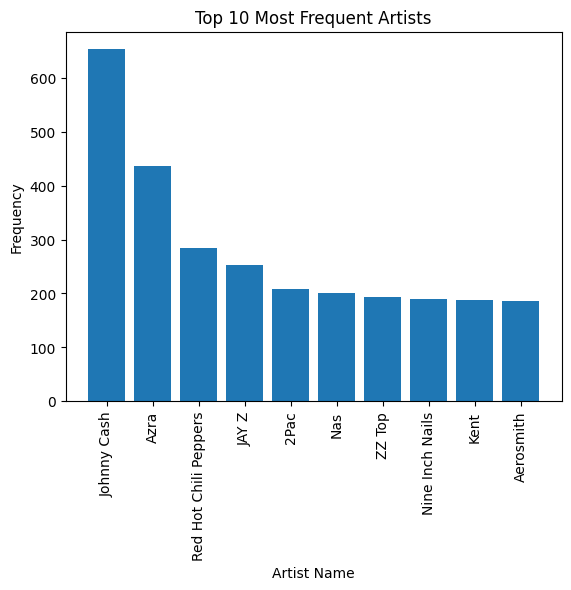

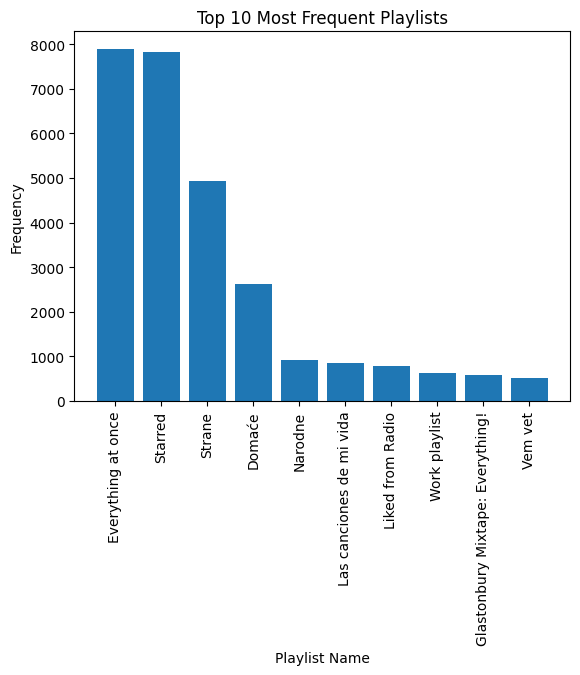

Strongest Association Rules for Artists:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []

Strongest Association Rules for Playlists:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [19]:
# Visualize artist names
top_artists = artist_encoded.sum().sort_values(ascending=False).head(10)
plt.bar(top_artists.index, top_artists.values)
plt.xticks(rotation=90)
plt.xlabel('Artist Name')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Artists')
plt.show()

# Visualize playlist names
top_playlists = playlist_encoded.sum().sort_values(ascending=False).head(10)
plt.bar(top_playlists.index, top_playlists.values)
plt.xticks(rotation=90)
plt.xlabel('Playlist Name')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Playlists')
plt.show()

# Measure strength of association rules
# We can analyze metrics like support, confidence, and lift from association rules
# For example, we can sort association rules by lift to identify the strongest ones
sorted_artist_rules = artist_association_rules.sort_values(by='lift', ascending=False)
sorted_playlist_rules = playlist_association_rules.sort_values(by='lift', ascending=False)

print("Strongest Association Rules for Artists:")
print(sorted_artist_rules.head())
print("\nStrongest Association Rules for Playlists:")
print(sorted_playlist_rules.head())

**PROPOSED RECOMMENDATION SYSTEM**

* Prompt the user to choose between selecting by artist name or playlist name.
* Based on the user's choice, set the category and category display variables accordingly (artistname or playlistname).
* Display the top 10 choices for the selected category (artist names or playlist names) along with their corresponding indices.
* Prompt the user to choose their preferred option by entering the corresponding number.
* If the input is invalid, display an error message and exit.
* Once a valid choice is made, filter the spotify_data DataFrame based on the user's preferred category.
* Recommend the top 10 track names along with their corresponding playlist names and artist names based on the filtered dataset.
* Format the top tracks DataFrame to include columns for track name, playlist name, and artist name.
* Display the top 10 track names, their corresponding playlist names, and artist names in a tabular format using the tabulate function with 'grid' table formatting.

In [22]:
from tabulate import tabulate

# Ask user to choose between artist name or playlist name
choice = input("Enter 'A' to choose by Artist Name or 'P' to choose by Playlist Name: ").upper()

if choice == 'A':
    category = 'artistname'
    category_display = 'Artist Name'
elif choice == 'P':
    category = 'playlistname'
    category_display = 'Playlist Name'
else:
    print("Invalid choice. Please enter 'A' or 'P'.")
    exit()

# Display top choices for the selected category
top_choices = spotify_data[category].value_counts().head(10)
print("\nTop 10 {}:".format(category_display))
for i, choice in enumerate(top_choices.index):
    print("{}. {}".format(i+1, choice))

# Ask user to choose their preferred option
selected_index = int(input("\nEnter the number corresponding to your preferred {}: ".format(category_display))) - 1

if selected_index < 0 or selected_index >= len(top_choices):
    print("Invalid input. Please choose a valid number.")
else:
    preferred_category = top_choices.index[selected_index]

    # Filter spotify_data based on user's preferred category
    filtered_songs = spotify_data[spotify_data[category] == preferred_category]

    # Recommend top 10 track names with their corresponding playlists and artists
    top_tracks = filtered_songs['trackname'].value_counts().head(10).reset_index()
    top_tracks.columns = ['Track Name', 'Frequency']
    top_tracks['Playlist Name'] = filtered_songs.loc[filtered_songs['trackname'].isin(top_tracks['Track Name']), 'playlistname'].unique()[0]
    top_tracks['Artist Name'] = filtered_songs.loc[filtered_songs['trackname'].isin(top_tracks['Track Name']), 'artistname'].unique()[0]

    # Display top 10 track names, their corresponding playlists, and artists in a tabular format
    print("\nTop 10 Track Names, Playlist Names, and Artist Names for {} '{}':".format(category_display, preferred_category))
    print(tabulate(top_tracks[['Track Name', 'Playlist Name', 'Artist Name']], headers='keys', tablefmt='grid'))


Enter 'A' to choose by Artist Name or 'P' to choose by Playlist Name:  A



Top 10 Artist Name:
1. Johnny Cash
2. Azra
3. Red Hot Chili Peppers
4. JAY Z
5. 2Pac
6. Nas
7. ZZ Top
8. Nine Inch Nails
9. Kent
10. Prljavo Kazalište



Enter the number corresponding to your preferred Artist Name:  5



Top 10 Track Names, Playlist Names, and Artist Names for Artist Name '2Pac':
+----+---------------------------------------------+--------------------+---------------+
|    | Track Name                                  | Playlist Name      | Artist Name   |
+====+=============================================+====================+===============+
|  0 | Changes                                     | Everything at once | 2Pac          |
+----+---------------------------------------------+--------------------+---------------+
|  1 | Troublesome '96 - 1998 Greatest Hits (Edit) | Everything at once | 2Pac          |
+----+---------------------------------------------+--------------------+---------------+
|  2 | Brenda's Got A Baby                         | Everything at once | 2Pac          |
+----+---------------------------------------------+--------------------+---------------+
|  3 | Ghetto Gospel - (Explicit)                  | Everything at once | 2Pac          |
+----+----------------